In [32]:
import pandas as pd
import os

In [53]:
pd.options.display.float_format = '{:.0f}'.format

def label_read(file):
    reader = pd.read_stata(file, iterator=True)
    variable_labels = reader.variable_labels()
    non_null_labels = {var: label for var, label in variable_labels.items() if label is not None and label.strip()}
    for var, label in non_null_labels.items():
        print(f"{var}: {label}")

In [ ]:
folder = 'PRPS 2014'
def f(file):
    return os.path.join(folder, file)

label_read(f('095_s6p4_m.dta'))

hid: household identifier
round: RHPS round indicator
s6p4_qa: Has anyone in the household who is aged 11 years or older temporary migrated out
r_pid: Roster Pid
s6p4_q2: Sex
s6p4_q3: Where Did [Name] Migrate?
s6p4_q4: Was The Village/City In Different District Or Country?
s6p4_q5_dc: Write Down Code Of District (And Country If Not Pakistan)
s6p4_q5_cc: Write Down Code Of Country (And Country If Not Pakistan)
s6p4_q6m14: Months During Which [Name] Was Gone March 2014
s6p4_q6f14: Months During Which [Name] Was Gone February 2014
s6p4_q6j14: Months During Which [Name] Was Gone January 2014
s6p4_q6d13: Months During Which [Name] Was Gone December 2013
s6p4_q6n13: Months During Which [Name] Was Gone November 2013
s6p4_q6o13: Months During Which [Name] Was Gone October 2013
s6p4_q6s13: Months During Which [Name] Was Gone September 2013
s6p4_q6ag13: Months During Which [Name] Was Gone August 2013
s6p4_q6jul13: Months During Which [Name] Was Gone July 2013
s6p4_q6jun13: Months During Which [N

In [49]:
columns_to_read = ['hid', 'r_pid', 's6p4_q3', 's6p4_q4', 's6p4_q7']
new_column_names = {
    's6p4_q3': 'migrate_to',
    's6p4_q4': 'is_diff_district',
    'rq3_age_year': 'age_year',
    's6p4_q7': 'migration_reason',
}

migration_male = pd.read_stata(f('095_s6p4_m.dta'), columns=columns_to_read)
migration_male = migration_male.rename(columns=new_column_names)

In [50]:
is_unique = not migration_male.duplicated(subset=['hid', 'r_pid']).any()
is_unique

True

In [51]:
migration_male.head()

,hid,r_pid,migrate_to,is_diff_district,migration_reason
0,10101010105,1,Rural Area,No,Employment
1,10101010105,2,Rural Area,No,Employment
2,10101010109,1,Rural Area,No,Employment
3,10101010109,2,Rural Area,No,Employment
4,10101010109,3,Rural Area,No,To Follow Family Member


In [ ]:
columns_to_read = ['hid', 'r_pid', 'rq2', 'rq4', 'rq3_age_year', 'rq15', 'rq17', 'rq20']
new_column_names = {
    'rq2': 'gender',
    'rq4': 'relation_to_head',
    'rq3_age_year': 'age_year',
    'rq15': 'marital_status',
    'rq17': 'spouse_pid',
    'rq20': 'employment'
}

roster_male = pd.read_stata(f('061_roster.dta'), columns=columns_to_read)
roster_male = roster_male.rename(columns=new_column_names)


In [46]:
roster_male.head()

,hid,r_pid,gender,relation_to_head,age_year,marital_status,spouse_pid,employment
0,10101010102,1,Male,No Difference,42,Currently Married,2,Employed
1,10101010102,2,Female,No Difference,38,Currently Married,1,Employed
2,10101010102,3,Female,No Difference,16,NaN,NaN,NaN
3,10101010102,4,Female,No Difference,13,Never Married,NaN,Not Working For Wages But Involve In Housework
4,10101010102,5,Female,No Difference,10,Never Married,NaN,Student


In [48]:
roster_male.groupby('employment', observed=False).size()

employment
Not Applicable (Age less than 10 years)           3282
Employed                                          3426
Looking For Work                                   107
Not Working For Wages But Involve In Housework    3621
Unemployed (Not Working,Not Looking For Work)      427
Student                                           1450
Retired/Recevied Pension                            29
dtype: int64

In [115]:
male_savings = pd.read_stata(f('083_s3p5_m.dta'), columns=['hid', 's3p5_q5']).rename(columns={'s3p5_q5': 'male_savings'})

In [116]:
female_savings = pd.read_stata(f('026_s3p2_f.dta'), columns=['hid', 's3p2_q5']).rename(columns={'s3p2_q5': 'female_savings'})

In [117]:
columns_to_read = ['hid','r_pid', 's2p3a_q1', 's2p3a_q18']
new_column_names = {
    's2p3a_q1': 'female_job_status',
    's2p3a_q18': 'female_annual_income',
}

female_income = pd.read_stata(f('018_s2p3a_f.dta'), columns=columns_to_read).rename(columns=new_column_names)

In [118]:
male_income = pd.read_stata(f('094_s6p3b_m.dta'), columns=['hid', 's6p3b_q4']).rename(columns={'s6p3b_q4': 'male_profit'})

In [119]:
male_income_agri = pd.read_stata(f('092_s6p2_m.dta'), columns=['hid', 'r_pid', 's6p2_q13']).rename(columns={'s6p2_q13': 'male_farm_income'})

In [260]:
df = pd.merge(migration_male, roster_male, on= ['hid', 'r_pid'], how='inner')

In [261]:
df = df.merge(female_savings, on='hid', how='left').merge(male_savings, on='hid', how='left')

In [262]:
df = df.merge(female_income, on=['hid', 'r_pid'], how='left').merge(male_income, on=['hid'], how='left').merge(male_income_agri, on=['hid', 'r_pid'], how='left')

In [263]:
df[['female_savings', 'male_savings', 'female_annual_income', 'male_profit', 'male_farm_income']] = \
df[['female_savings', 'male_savings', 'female_annual_income', 'male_profit', 'male_farm_income']].fillna(0)

df['age_year'] = pd.to_numeric(df['age_year'], errors='coerce')
df = df[df['age_year'] >= 15]

df['spouse_pid'] = df['spouse_pid'].fillna(-1)
df['female_job_status'] = df['female_job_status'].cat.add_categories('Unemployed')
df['female_job_status'] = df['female_job_status'].fillna('Unemployed')


len(df)

513

In [264]:
df = df.dropna(subset=['gender', 'r_pid', 'hid'])
categorical_columns = df.select_dtypes(include='category').columns
for col in categorical_columns:
    df[col] = df[col].cat.add_categories('unknown')

In [265]:
df.dropna(inplace=True)

In [267]:
df.head()

,hid,r_pid,migrate_to,is_diff_district,migration_reason,gender,relation_to_head,age_year,marital_status,spouse_pid,employment,female_savings,male_savings,female_job_status,female_annual_income,male_profit,male_farm_income
0,10101010105,1,Rural Area,No,Employment,Male,No Difference,39,Currently Married,2,Employed,0,0,Unemployed,0,0,0
1,10101010105,2,Rural Area,No,Employment,Female,No Difference,35,Currently Married,1,Employed,0,0,Temporary Employee,0,0,0
2,10101010109,1,Rural Area,No,Employment,Male,No Difference,34,Currently Married,2,Employed,0,0,Unemployed,0,0,0
3,10101010109,2,Rural Area,No,Employment,Female,No Difference,32,Currently Married,1,Employed,0,0,Temporary Employee,0,0,0
7,10101010121,3,Urban Area,Yes,Employment,Male,No Difference,16,Never Married,-1,Employed,0,12000,Unemployed,0,0,0


In [268]:
df.to_csv('combined_dataset_2014.csv', index=False)

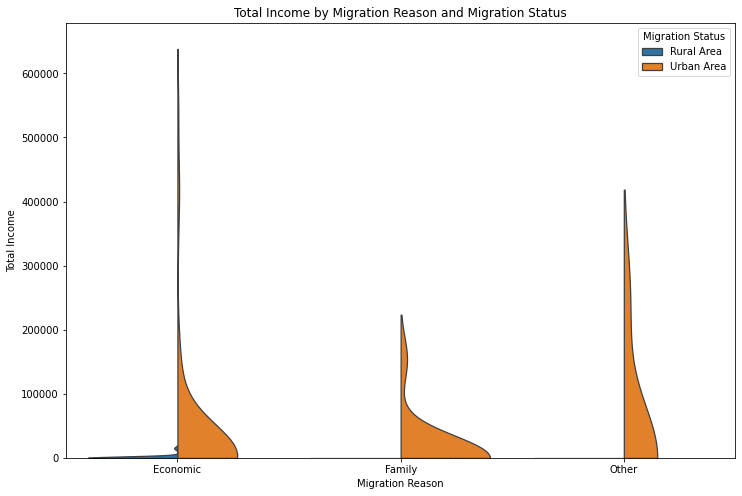

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df.copy()
df_copy['total_income'] = (
    df_copy['female_annual_income'] + 
    df_copy['male_profit'] + 
    df_copy['male_farm_income']
)

df_copy['migration_reason'] = df_copy['migration_reason'].astype(str).str.strip()
df_copy['migration_reason_grouped'] = df_copy['migration_reason'].replace({
    'Employment': 'Economic',
    'Education': 'Economic',
    'Marriage': 'Family',
    'To Follow Family Member': 'Family',
    'Natural Disaster': 'Other',
    'For Medical Assistance/ Treatment': 'Other',
    'unknown': 'Other'
})

df_copy['migrate_to'] = df_copy['migrate_to'].astype(str).str.strip()
df_copy['migrate_status'] = df_copy['migrate_to'].replace({
    'Rural': 'Migrated',
    'Urban': 'Migrated',
    'unknown': 'Non-Migrated'
})

plt.figure(figsize=(12, 8))
sns.violinplot(data=df_copy, x='migration_reason_grouped', y='total_income', hue='migrate_status', split=True, inner="quartile", bw_adjust=1.5)
plt.title('Total Income by Migration Reason and Migration Status')
plt.xlabel('Migration Reason')
plt.ylabel('Total Income')
plt.legend(title='Migration Status')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, None)
plt.show()


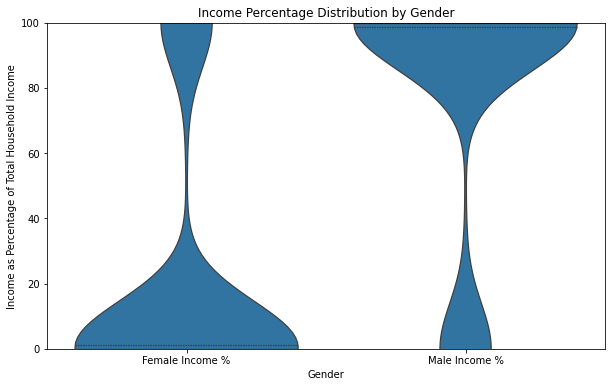

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df.copy()

df_copy['female_total_income'] = df_copy['female_savings'] + df_copy['female_annual_income']
df_copy['male_total_income'] = df_copy['male_savings'] + df_copy['male_profit'] + df_copy['male_farm_income']
df_copy['total_household_income'] = df_copy['female_total_income'] + df_copy['male_total_income']

df_copy['female_income_percentage'] = (df_copy['female_total_income'] / df_copy['total_household_income']) * 100
df_copy['male_income_percentage'] = (df_copy['male_total_income'] / df_copy['total_household_income']) * 100

income_percentage_df = pd.melt(
    df_copy[['female_income_percentage', 'male_income_percentage']],
    var_name='Gender',
    value_name='Income Percentage'
)
income_percentage_df['Gender'] = income_percentage_df['Gender'].replace({
    'female_income_percentage': 'Female Income %',
    'male_income_percentage': 'Male Income %'
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=income_percentage_df, x='Gender', y='Income Percentage', inner='quartile')
plt.title('Income Percentage Distribution by Gender')
plt.ylabel('Income as Percentage of Total Household Income')
plt.xlabel('Gender')
plt.ylim(0, 100)  
plt.show()
